In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

TEXT_DATA = pd.read_csv("/data/prabowo.csv")
TEXT_DATA.head()

created_at       username  \
0  Fri Aug 11 00:18:47 +0000 2023   kalebdamonda   
1  Fri Aug 11 07:26:34 +0000 2023  Mahardika9036   
2  Fri Aug 18 08:15:16 +0000 2023   MyNameIsJuki   
3  Fri Aug 18 17:06:22 +0000 2023   MyNameIsJuki   
4  Fri Jan 06 11:43:17 +0000 2023   Backup098765   

                                                text  
0  Prabowo Subianto ga becus kerja!! https://t.co...  
1  Prabowo Subianto tidak becus menhan, hanya ham...  
2  Gosah sok peduli ganjar, @PDI_Perjuangan kriti...  
3  KAMPRET pandai berkilah,menteri nya gak becus ...  
4  Mereka yang tidak ingin keadaan bangsa kita be...

In [ ]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
TEXT_DATA['prepros_text'] = TEXT_DATA['text'].str.lower()


print('Case Folding Result : \n')
print(TEXT_DATA['prepros_text'].head(5))
print('\n\n\n')

Case Folding Result : 

0    prabowo subianto ga becus kerja!! https://t.co...
1    prabowo subianto tidak becus menhan, hanya ham...
2    gosah sok peduli ganjar, @pdi_perjuangan kriti...
3    kampret pandai berkilah,menteri nya gak becus ...
4    mereka yang tidak ingin keadaan bangsa kita be...
Name: prepros_text, dtype: object






In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#pra pemrosesan data
def remove_text_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_text_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_number)

#remove punctuation [tanda baca]
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_singl_char)

# ------ Tokenizing ---------

# NLTK word rokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

TEXT_DATA['text_tokens'] = TEXT_DATA['prepros_text'].apply(word_tokenize_wrapper)

print('Removal Punctuation : \n')
print(TEXT_DATA['prepros_text'].head())
print('\n')

print('Tokenizing Result : \n')
print(TEXT_DATA['text_tokens'].head())
print('\n\n\n')

Removal Punctuation : 

0                      prabowo subianto ga becus kerja
1    prabowo subianto tidak becus menhan hanya hamb...
2    gosah sok peduli ganjar perjuangan kritik food...
3    kampret pandai berkilahmenteri nya gak becus b...
4    mereka yang tidak ingin keadaan bangsa kita be...
Name: prepros_text, dtype: object


Tokenizing Result : 

0                [prabowo, subianto, ga, becus, kerja]
1    [prabowo, subianto, tidak, becus, menhan, hany...
2    [gosah, sok, peduli, ganjar, perjuangan, kriti...
3    [kampret, pandai, berkilahmenteri, nya, gak, b...
4    [mereka, yang, tidak, ingin, keadaan, bangsa, ...
Name: text_tokens, dtype: object






In [ ]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

TEXT_DATA['text_tokens_fdist'] = TEXT_DATA['text_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(TEXT_DATA['text_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(prabowo, 1), (subianto, 1), (ga, 1), (becus,...
1    [(prabowo, 1), (subianto, 1), (tidak, 1), (bec...
2    [(ganjar, 2), (yg, 2), (ke, 2), (gosah, 1), (s...
3    [(yg, 2), (kampret, 1), (pandai, 1), (berkilah...
4    [(dan, 3), (yang, 2), (akan, 2), (untuk, 2), (...
Name: text_tokens_fdist, dtype: object


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project Ujaran Kebencian/stopwordsID.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

TEXT_DATA['text_tokens_WSW'] = TEXT_DATA['text_tokens'].apply(stopwords_removal)


print(TEXT_DATA['text_tokens_WSW'].head())

0                    [prabowo, subianto, becus, kerja]
1    [prabowo, subianto, becus, menhan, hamburkan, ...
2    [gosah, sok, peduli, ganjar, perjuangan, kriti...
3    [kampret, pandai, berkilahmenteri, becus, adu,...
4    [bangsa, berobah, mempertahankan, kondisi, kor...
Name: text_tokens_WSW, dtype: object


In [ ]:
!pip install xlrd
!pip install openpyxl

In [ ]:
normalizad_word = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Project Ujaran Kebencian/normalisasi.xlsx", engine='openpyxl')

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

TEXT_DATA['text_normalized'] = TEXT_DATA['text_tokens_WSW'].apply(normalized_term)

TEXT_DATA['text_normalized'].head(10)

0                    [prabowo, subianto, becus, kerja]
1    [prabowo, subianto, becus, menhan, hamburkan, ...
2    [jangan, sok, peduli, ganjar, perjuangan, krit...
3    [sialan, pandai, berkilahmenteri, becus, adu, ...
4    [bangsa, berobah, mempertahankan, kondisi, kor...
5    [kerjaan, prabowo, subianto, ngada, becus, men...
6    [prabowo, subianto, becus, kerja, beli, pesawa...
7    [maaf, komisipemberantaskoruptor, gandeng, kem...
8    [janjijanji, manis, mulutnya, daerahkhususibuk...
9                             [prabowo, hancur, minah]
Name: text_normalized, dtype: object

In [ ]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=deda25559bfe5ed7fe069efaba23b11a15a7f1693133e93c7deda21d1b11ceba
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
!pip install pandas numpy matplotlib Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in TEXT_DATA['text_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

TEXT_DATA['text_tokens_stemmed'] = TEXT_DATA['text_normalized'].swifter.apply(get_stemmed_term)
print(TEXT_DATA['text_tokens_stemmed'])

4811
------------------------
prabowo : prabowo
subianto : subianto
becus : becus
kerja : kerja
menhan : menhan
hamburkan : hambur
uang : uang
negara : negara
jangan : jangan
sok : sok
peduli : peduli
ganjar : ganjar
perjuangan : juang
kritik : kritik
food : food
estate : estate
krna : krna
menteri : menteri
tugaskan : tugas
jokowi : jokowi
namanya : nama
paham : paham
ajah : ajah
bersebrangan : bersebrangan
partaidemokrasiIndonesiaperjuangan : partaidemokrasiindonesiaperjuangan
id : id
condong : condong
gerindra : gerindra
suka : suka
serangan : serang
pengusung : usung
sialan : sial
pandai : pandai
berkilahmenteri : berkilahmenteri
adu : adu
presiden : presiden
partainya : partai
ituloh : ituloh
berkuasa : kuasa
begini : begini
yak : yak
bangsa : bangsa
berobah : berobah
mempertahankan : tahan
kondisi : kondisi
korupsi : korupsi
bobrok : bobrok
fitnah : fitnah
isu : isu
dihembuskan : hembus
menghambat : hambat
kerjaan : kerja
ngada : ngada
beli : beli
pesawat : pesawat
rongsok : rong

Pandas Apply:   0%|          | 0/2099 [00:00<?, ?it/s]

0                       [prabowo, subianto, becus, kerja]
1       [prabowo, subianto, becus, menhan, hambur, uan...
2       [jangan, sok, peduli, ganjar, juang, kritik, f...
3       [sial, pandai, berkilahmenteri, becus, adu, pr...
4       [bangsa, berobah, tahan, kondisi, korupsi, bob...
                              ...                        
2094    [prabowo, dadak, blusukan, media, center, ktt,...
2095    [wilayah, aglomerasi, kultural, ganjar, unggul...
2096    [wilayah, aglomerasi, kultural, ganjar, unggul...
2097    [kendati, ganjar, usung, partaidemokrasiindone...
2098    [simulasi, calon, head, to, head, prabowo, bal...
Name: text_tokens_stemmed, Length: 2099, dtype: object


# Hasil Pre-Prosesing

In [ ]:
TEXT_DATA.to_csv("Text_Preprocessing.csv")

In [ ]:
print('\nNormalized Result : \n')
print(TEXT_DATA['text_normalized'].head(10))

print('\nStemming Result : \n')
print(TEXT_DATA['text_tokens_stemmed'].head(10))


Normalized Result : 

0                    [prabowo, subianto, becus, kerja]
1    [prabowo, subianto, becus, menhan, hamburkan, ...
2    [jangan, sok, peduli, ganjar, perjuangan, krit...
3    [sialan, pandai, berkilahmenteri, becus, adu, ...
4    [bangsa, berobah, mempertahankan, kondisi, kor...
5    [kerjaan, prabowo, subianto, ngada, becus, men...
6    [prabowo, subianto, becus, kerja, beli, pesawa...
7    [maaf, komisipemberantaskoruptor, gandeng, kem...
8    [janjijanji, manis, mulutnya, daerahkhususibuk...
9                             [prabowo, hancur, minah]
Name: text_normalized, dtype: object

Stemming Result : 

0                    [prabowo, subianto, becus, kerja]
1    [prabowo, subianto, becus, menhan, hambur, uan...
2    [jangan, sok, peduli, ganjar, juang, kritik, f...
3    [sial, pandai, berkilahmenteri, becus, adu, pr...
4    [bangsa, berobah, tahan, kondisi, korupsi, bob...
5     [kerja, prabowo, subianto, ngada, becus, menhan]
6    [prabowo, subianto, becus, kerja, 

In [ ]:
print('Original Text : \n')
print(TEXT_DATA['text'].loc[1], '\n')
print(TEXT_DATA['text'].loc[2], '\n')
print(TEXT_DATA['text'].loc[3], '\n\n')

# ------ Case Folding --------
TEXT_DATA['case_folding'] = TEXT_DATA['text'].str.lower()
print('Case Folding : \n')
print(TEXT_DATA['case_folding'].loc[1], '\n')
print(TEXT_DATA['case_folding'].loc[2], '\n')
print(TEXT_DATA['case_folding'].loc[3], '\n\n')

# ------ Removal Punctuation ---------
print('Removal Punctuation : \n')
print(TEXT_DATA['prepros_text'].loc[1], '\n')
print(TEXT_DATA['prepros_text'].loc[2], '\n')
print(TEXT_DATA['prepros_text'].loc[3], '\n\n')

# ------ Tokenizing ---------
print('Tokenizing : \n')
print(TEXT_DATA['text_tokens'].loc[1], '\n')
print(TEXT_DATA['text_tokens'].loc[2], '\n')
print(TEXT_DATA['text_tokens'].loc[3], '\n\n')

# ------ Stopword ---------
print('Stopword : \n')
print(TEXT_DATA['text_tokens_WSW'].loc[1], '\n')
print(TEXT_DATA['text_tokens_WSW'].loc[2], '\n')
print(TEXT_DATA['text_tokens_WSW'].loc[3], '\n\n')

# ------ Normalization ---------
print('Normalization : \n')
print(TEXT_DATA['text_normalized'].loc[1], '\n')
print(TEXT_DATA['text_normalized'].loc[2], '\n')
print(TEXT_DATA['text_normalized'].loc[3], '\n\n')

# ------ Stemming ---------
print('Stemming : \n')
print(TEXT_DATA['text_tokens_stemmed'].loc[1], '\n')
print(TEXT_DATA['text_tokens_stemmed'].loc[2], '\n')
print(TEXT_DATA['text_tokens_stemmed'].loc[3], '\n\n')

Original Text : 

Prabowo Subianto tidak becus menhan, hanya hamburkan uang negara https://t.co/yaYWhDHh8e 

Gosah sok peduli ganjar, @PDI_Perjuangan kritik food estate krna MENTERI yg di tugaskan pak jokowi tdk BECUS bekerja namanya PRABOWO SUBIANTO. Buat yg paham ajah @adearmando61 bersebrangan dg PDIP krn @psi_id condong ke GERINDRA makanya suka melakukan serangan ke pengusung ganjar 

KAMPRET pandai berkilah,menteri nya gak becus bekerja malah yg di adu presiden dan partainya.  Menteri apa sih? Ituloh MENHAN yg namanya PRABOWO SUBIANTO.  Ingin berkuasa kok gini amat yak? ÃƒÂ°Ã…Â¸Ã‚Â¤Ã‚Â£ÃƒÂ°Ã…Â¸Ã‚Â¤Ã‚Â£ÃƒÂ°Ã…Â¸Ã‚Â¤Ã‚Â£ÃƒÂ°Ã…Â¸Ã‚Â¤Ã‚Â£ 


Case Folding : 

prabowo subianto tidak becus menhan, hanya hamburkan uang negara https://t.co/yaywhdhh8e 

gosah sok peduli ganjar, @pdi_perjuangan kritik food estate krna menteri yg di tugaskan pak jokowi tdk becus bekerja namanya prabowo subianto. buat yg paham ajah @adearmando61 bersebrangan dg pdip krn @psi_id condong ke gerindra makanya suka 

## Proses TFIDF

In [ ]:
# load dataset
raw_data = pd.read_csv("/content/Text_Preprocessing.csv", usecols=["created_at", "username", "text", "prepros_text", "text_tokens_stemmed"])
raw_data.columns = ["created_at", "username", "text", "prepros_text", "text_tokens_stemmed"]
raw_data.head()

created_at       username  \
0  Fri Aug 11 00:18:47 +0000 2023   kalebdamonda   
1  Fri Aug 11 07:26:34 +0000 2023  Mahardika9036   
2  Fri Aug 18 08:15:16 +0000 2023   MyNameIsJuki   
3  Fri Aug 18 17:06:22 +0000 2023   MyNameIsJuki   
4  Fri Jan 06 11:43:17 +0000 2023   Backup098765   

                                                text  \
0  Prabowo Subianto ga becus kerja!! https://t.co...   
1  Prabowo Subianto tidak becus menhan, hanya ham...   
2  Gosah sok peduli ganjar, @PDI_Perjuangan kriti...   
3  KAMPRET pandai berkilah,menteri nya gak becus ...   
4  Mereka yang tidak ingin keadaan bangsa kita be...   

                                        prepros_text  \
0                    prabowo subianto ga becus kerja   
1  prabowo subianto tidak becus menhan hanya hamb...   
2  gosah sok peduli ganjar perjuangan kritik food...   
3  kampret pandai berkilahmenteri nya gak becus b...   
4  mereka yang tidak ingin keadaan bangsa kita be...   

                                 text_tokens_stemmed  
0          ['prabowo', 'subianto', 'becus', 'kerja']  
1  ['prabowo', 'subianto', 'becus', 'menhan', 'ha...  
2  ['jangan', 'sok', 'peduli', 'ganjar', 'juang',...  
3  ['sial', 'pandai', 'berkilahmenteri', 'becus',...  
4  ['bangsa', 'berobah', 'tahan', 'kondisi', 'kor...

In [ ]:
# convert list formated string to list
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

raw_data["text_list"] = raw_data["text_tokens_stemmed"].apply(convert_text_list)


#print(raw_data["text_list"][90])

#print("\ntype : ", type(raw_data["text_list"][90]))

In [ ]:
##Term Frequency (TF)


def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

raw_data["TF_dict"] = raw_data['text_list'].apply(calc_TF)

raw_data["TF_dict"].head()

0    {'prabowo': 0.25, 'subianto': 0.25, 'becus': 0...
1    {'prabowo': 0.14285714285714285, 'subianto': 0...
2    {'jangan': 0.037037037037037035, 'sok': 0.0370...
3    {'sial': 0.0625, 'pandai': 0.0625, 'berkilahme...
4    {'bangsa': 0.08333333333333333, 'berobah': 0.0...
Name: TF_dict, dtype: object

In [ ]:
# Check TF result
index = 90

print('%20s' % "term", "\t", "TF\n")
for key in raw_data["TF_dict"][index]:
    print('%20s' % key, "\t", raw_data["TF_dict"][index][key])

                term 	 TF

                 isu 	 0.09090909090909091
             prabowo 	 0.09090909090909091
              gampar 	 0.09090909090909091
               cekik 	 0.09090909090909091
               wamen 	 0.09090909090909091
               sebar 	 0.09090909090909091
              buzzer 	 0.09090909090909091
partaidemokrasiindonesiaperjuangan 	 0.09090909090909091
               jatuh 	 0.09090909090909091
            presiden 	 0.09090909090909091
              jokowi 	 0.09090909090909091


In [ ]:
##Inverse Document Frequency (IDF)

def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(raw_data["TF_dict"])

In [ ]:
n_document = len(raw_data)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict

#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [ ]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
raw_data["TF-IDF_dict"] = raw_data["TF_dict"].apply(calc_TF_IDF)

In [ ]:
raw_data["TF-IDF_dict"]

0       {'prabowo': 0.041352408038699454, 'subianto': ...
1       {'prabowo': 0.0236299474506854, 'subianto': 0....
2       {'jangan': 0.2576321903429884, 'sok': 0.231960...
3       {'sial': 0.4094127519470327, 'pandai': 0.43475...
4       {'bangsa': 0.2833934231476061, 'berobah': 0.57...
                              ...                        
2094    {'prabowo': 0.020676204019349727, 'dadak': 0.7...
2095    {'wilayah': 0.5490184576353803, 'aglomerasi': ...
2096    {'wilayah': 0.5490184576353803, 'aglomerasi': ...
2097    {'kendati': 0.28690609277959067, 'ganjar': 0.1...
2098    {'simulasi': 0.24526162708456742, 'calon': 0.1...
Name: TF-IDF_dict, Length: 2099, dtype: object

In [ ]:
# Check TF-IDF result
index = 90

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in raw_data["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", raw_data["TF_dict"][index][key] ,"\t" , raw_data["TF-IDF_dict"][index][key])

                term 	         TF 	              TF-IDF

                 isu 	 0.09090909090909091 	 0.24421560814188417
             prabowo 	 0.09090909090909091 	 0.015037239286799802
              gampar 	 0.09090909090909091 	 0.5955094573775022
               cekik 	 0.09090909090909091 	 0.17746571211956624
               wamen 	 0.09090909090909091 	 0.17746571211956624
               sebar 	 0.09090909090909091 	 0.3262521190249285
              buzzer 	 0.09090909090909091 	 0.5063431616491634
partaidemokrasiindonesiaperjuangan 	 0.09090909090909091 	 0.30786694934357434
               jatuh 	 0.09090909090909091 	 0.5063431616491634
            presiden 	 0.09090909090909091 	 0.2006180553908036
              jokowi 	 0.09090909090909091 	 0.203415478905963


In [ ]:
# sort descending by value for DF dictionary
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

raw_data["TF_IDF_Vec"] = raw_data["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(raw_data["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(raw_data["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[0.041352408038699454, 0.3436135746446735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8431375502011444, 0.0]

matrix size :  50


In [ ]:
# Convert Series to List
TF_IDF_Vec_List = np.array(raw_data["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))

ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

term       rank
7      sukses  80.054018
2      dukung  75.860511
1    subianto  73.127942
3      unggul  63.609656
8        puji  56.632884
5       wamen  52.412836
4       cekik  52.412777
6      ganjar  50.797069
20      projo  49.018738
12      gagal  48.840087
15     hancur  46.239936
28     jateng  45.775817
9    presiden  44.410712
11     menang  43.540423
10     jokowi  43.496842
16      keren  42.620331
19     survei  39.666867
13     tampar  38.964956
21        isu  37.628175
31   panglima  36.856954
33     masdar  36.280851
0     prabowo  36.172661
14  indonesia  36.038637
40       moga  35.716263
18     gibran  35.652802
32     pimpin  31.050173
22     capres  29.964782
17       bowo  29.609735
26    pilpres  28.726913
23   cawapres  28.553310
29     mahfud  27.669317
35     pasang  27.281739
34     negara  26.391648
38         md  25.557086
24      calon  23.894851
36      anies  23.753650
37    percaya  23.700575
39      hasil  23.120673
30     negeri  22.671160
41      pilih  22.157119
48      kerja  21.583031
25     bangun  21.154645
42       adem  21.002882
44      milih  20.333248
27     bareng  19.621115
46         ri  19.133924
47      resmi  18.023417
43      hebat  17.363103
49       nama  17.034033
45     rakyat  15.959107

In [ ]:
TF_IDF_Vec_List

array([[0.04135241, 0.34361357, 0.        , ..., 0.        , 0.84313755,
        0.        ],
       [0.02362995, 0.19635061, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00612628, 0.05090571, 0.        , ..., 0.        , 0.        ,
        0.12490927],
       ...,
       [0.00918942, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00918942, 0.        , 0.        , ..., 0.        , 0.        ,
        0.1873639 ],
       [0.01102731, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
raw_data["text_join"] = raw_data["text_tokens_stemmed"].apply(join_text_list)

raw_data["text_join"].head()

0                         prabowo subianto becus kerja
1     prabowo subianto becus menhan hambur uang negara
2    jangan sok peduli ganjar juang kritik food est...
3    sial pandai berkilahmenteri becus adu presiden...
4    bangsa berobah tahan kondisi korupsi bobrok fi...
Name: text_join, dtype: object

In [ ]:
# banyaknya term yang akan digunakan,
# di pilih berdasarkan top max_features
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 1000

# Feature Engineering
print ("------- TF-IDF on Tweet data -------")

tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(raw_data["text_join"]).toarray()

print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)

------- TF-IDF on Tweet data -------
TF-IDF  <class 'numpy.ndarray'> (2099, 1000)


In [ ]:
terms = tf_idf.get_feature_names_out()

# sum tfidf frequency of each term through documents
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

term        rank
709    prabowo  161.733823
866   subianto   95.618969
235     dukung   93.603337
872     sukses   80.995072
962     unggul   73.863653
..         ...         ...
327      heran    0.966588
304  hadibroto    0.902129
645      paloh    0.793258
310     hanura    0.774314
795     santri    0.774314

[1000 rows x 2 columns]

## Menghitung TF Scikit-Learn dengan CountVectorizer() / L1 Norm

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

# calc TF vector
cvect = CountVectorizer(max_features=max_features)
TF_vector = cvect.fit_transform(raw_data["text_join"])

# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)

# calc IDF
tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
tfs = tfidf.fit_transform(raw_data["text_join"])
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()

## Contoh perhitungan TF-IDF L1 Normalization Unigram, Bigram, Trigram

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

# ngram_range (1, 3) to use unigram, bigram, trigram
cvect = CountVectorizer(max_features=max_features, ngram_range=(1,3))
counts = cvect.fit_transform(raw_data["text_join"])

normalized_counts = normalize(counts, norm='l1', axis=1)

tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(1,3), smooth_idf=False)
tfs = tfidf.fit_transform(raw_data["text_join"])

tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()

In [ ]:
tfidf_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfidf.get_feature_names_out()

array(['abadi', 'acara', 'acara deklarasi', 'acara deklarasi budi',
       'adem', 'adem bowo', 'adem bowo milih', 'adu', 'agus',
       'agus yudhoyono', 'agus yudhoyono demokrat',
       'agus yudhoyono pdemokrat', 'ahok', 'ahy', 'ahy keluar',
       'ahy keluar instruksi', 'ahy titip', 'ahy titip pesan', 'ajar',
       'aksi', 'aktor', 'aku', 'akuisisi', 'akuisisi prabowo',
       'akuisisi prabowo selesai', 'alas', 'alifurrahman', 'all',
       'amanah', 'ambil', 'amin', 'anak', 'anda', 'andika',
       'andika perkasa', 'angka', 'anies', 'anies baswedan', 'apa',
       'arah', 'arah prabowo', 'arah prabowo keren', 'arhan',
       'arhan puji', 'arhan puji prabowo', 'asia', 'asia pratama',
       'asia pratama arhan', 'asing', 'baca', 'bacapres',
       'bacapres prabowo', 'bacapres prabowo subianto', 'back', 'bagai',
       'bagaimana', 'bagus', 'bahagia', 'bahas', 'bahas calon',
       'bahas calon cawapres', 'baik', 'baja', 'balas', 'balik',
       'banding', 'bang', 'banget', '

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000


def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram))
    counts = cvect.fit_transform(raw_data["text_join"])

    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram), smooth_idf=False)
    tfs = tfidf.fit_transform(raw_data["text_join"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()

    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names_out()

# ngram_range (1, 1) to use unigram only
tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)

# ngram_range (2, 2) to use bigram only
tf_mat_bigram, idf_mat_bigram, tfidf_mat_bigram, terms_bigram = generate_tfidf_mat(2,2)

# ngram_range (3, 3) to use trigram only
tf_mat_trigram, idf_mat_trigram, tfidf_mat_trigram, terms_trigram = generate_tfidf_mat(3,3)

# ---------- check sparse data -------------------
idx_sample = 0

print("Show TFIDF sample ke-" + str(idx_sample), "\n")
print(raw_data["text_tokens_stemmed"][idx_sample], "\n")

print("\t\t\t", "TF", "\t\t", "IDF", "\t\t", "TF-IDF", "\t", "Term\n")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
    if(item[2] != 0.0):
        print ("array position " + str(i) + "\t",
               "%.6f" % item[0], "\t",
               "%.6f" % item[1], "\t",
               "%.6f" % item[2], "\t",
               item[3])

Show TFIDF sample ke-0 

['prabowo', 'subianto', 'becus', 'kerja'] 

			 TF 		 IDF 		 TF-IDF 	 Term

array position 115	 0.250000 	 4.571679 	 1.142920 	 becus
array position 457	 0.250000 	 4.386536 	 1.096634 	 kerja
array position 705	 0.250000 	 1.165972 	 0.291493 	 prabowo
array position 860	 0.250000 	 2.376339 	 0.594085 	 subianto


In [ ]:
tfidf_mat_unigram

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### PyCaret

In [ ]:
pip install pycaret --ignore-installed llvmlite numba

  Using cached pycaret-3.1.0-py3-none-any.whl (483 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.0/807.0 kB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 15.1 MB/s eta 0:00:00
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 79.9 MB/s eta 0:00:00
  Using cached pyod-1.1.0.tar.gz (

In [ ]:
from pycaret.clustering import *

ImportError: ignored

In [ ]:
pros_data = raw_data[['text', 'text_tokens_stemmed','text_join']]
pros_data.head()

In [ ]:
pros_data.info()

In [ ]:
# Inisialisasi setup Pycaret
setup(pros_data, normalize = True, session_id = 123)

In [ ]:
# Buat model K-Means
kmeans = create_model('kmeans', num_clusters = 3)

In [ ]:
kmean_results = assign_model(kmeans)
kmean_results.head()

In [ ]:
# save to file
kmean_results.to_csv('/content/sample_data/kmean_pycaret.csv', index=False)

In [ ]:
plot_model(kmeans)

In [ ]:
plot_model(kmeans, plot = 'elbow')

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
plot_model(kmeans, plot = 'distribution')

### K-means Proses

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
def preprocessing(line):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    return line

In [ ]:
#vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(raw_data["text_join"])
#X = tfs
VX = vectorizer.fit_transform(raw_data["text_join"])

In [ ]:
tfs

<2099x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 30837 stored elements in Compressed Sparse Row format>

In [ ]:
#tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocessing)
#tfidf = tfidf_vectorizer.fit_transform(comment_join)
#tfidf = tfidf_mat_unigram
#tfidf = tfs
#tfidf = tfidf_mat_unigram

In [ ]:
#kmeans = KMeans(n_clusters=2).fit(tfidf)

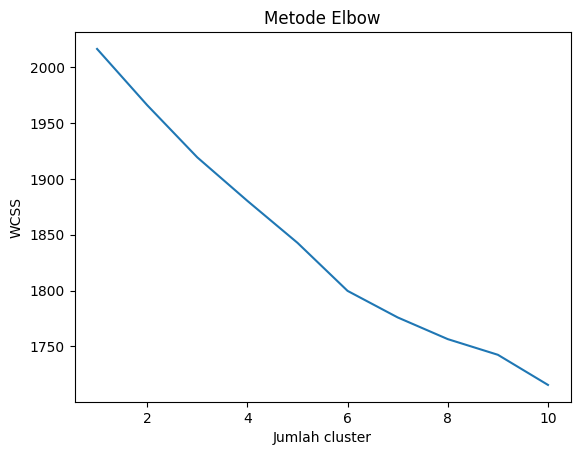

In [ ]:
# Membuat TF-IDF matrix
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(raw_data['comment_join'])

# Mencari nilai K yang optimal dengan metode elbow
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah cluster')
plt.ylabel('WCSS')
plt.show()

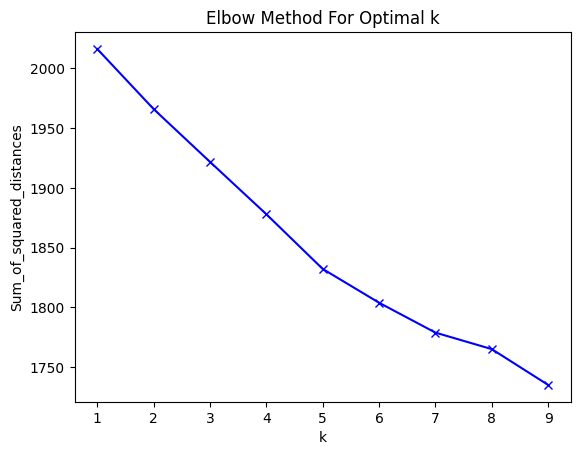

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
import seaborn as sns

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=6, random_state=100)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Menambahkan kolom cluster, x0, x1 pada data frame df

In [ ]:
# assign clusters and pca vectors to our dataframe
raw_data['cluster'] = clusters
raw_data['x0'] = x0
raw_data['x1'] = x1

In [ ]:
raw_data.head()

created_at       username  \
0  Fri Aug 11 00:18:47 +0000 2023   kalebdamonda   
1  Fri Aug 11 07:26:34 +0000 2023  Mahardika9036   
2  Fri Aug 18 08:15:16 +0000 2023   MyNameIsJuki   
3  Fri Aug 18 17:06:22 +0000 2023   MyNameIsJuki   
4  Fri Jan 06 11:43:17 +0000 2023   Backup098765   

                                                text  \
0  Prabowo Subianto ga becus kerja!! https://t.co...   
1  Prabowo Subianto tidak becus menhan, hanya ham...   
2  Gosah sok peduli ganjar, @PDI_Perjuangan kriti...   
3  KAMPRET pandai berkilah,menteri nya gak becus ...   
4  Mereka yang tidak ingin keadaan bangsa kita be...   

                                        prepros_text  \
0                    prabowo subianto ga becus kerja   
1  prabowo subianto tidak becus menhan hanya hamb...   
2  gosah sok peduli ganjar perjuangan kritik food...   
3  kampret pandai berkilahmenteri nya gak becus b...   
4  mereka yang tidak ingin keadaan bangsa kita be...   

                                 text_tokens_stemmed  \
0          ['prabowo', 'subianto', 'becus', 'kerja']   
1  ['prabowo', 'subianto', 'becus', 'menhan', 'ha...   
2  ['jangan', 'sok', 'peduli', 'ganjar', 'juang',...   
3  ['sial', 'pandai', 'berkilahmenteri', 'becus',...   
4  ['bangsa', 'berobah', 'tahan', 'kondisi', 'kor...   

                                           text_list  \
0                  [prabowo, subianto, becus, kerja]   
1  [prabowo, subianto, becus, menhan, hambur, uan...   
2  [jangan, sok, peduli, ganjar, juang, kritik, f...   
3  [sial, pandai, berkilahmenteri, becus, adu, pr...   
4  [bangsa, berobah, tahan, kondisi, korupsi, bob...   

                                             TF_dict  \
0  {'prabowo': 0.25, 'subianto': 0.25, 'becus': 0...   
1  {'prabowo': 0.14285714285714285, 'subianto': 0...   
2  {'jangan': 0.037037037037037035, 'sok': 0.0370...   
3  {'sial': 0.0625, 'pandai': 0.0625, 'berkilahme...   
4  {'bangsa': 0.08333333333333333, 'berobah': 0.0...   

                                         TF-IDF_dict  \
0  {'prabowo': 0.041352408038699454, 'subianto': ...   
1  {'prabowo': 0.0236299474506854, 'subianto': 0....   
2  {'jangan': 0.2576321903429884, 'sok': 0.231960...   
3  {'sial': 0.4094127519470327, 'pandai': 0.43475...   
4  {'bangsa': 0.2833934231476061, 'berobah': 0.57...   

                                          TF_IDF_Vec  \
0  [0.041352408038699454, 0.3436135746446735, 0.0...   
1  [0.0236299474506854, 0.19635061408267057, 0.0,...   
2  [0.006126282672399919, 0.05090571476217385, 0....   
3  [0.010338102009674863, 0.08590339366116838, 0....   
4  [0.013784136012899817, 0.11453785821489117, 0....   

                                           text_join  cluster        x0  \
0                       prabowo subianto becus kerja        4  0.039914   
1   prabowo subianto becus menhan hambur uang negara        4  0.003946   
2  jangan sok peduli ganjar juang kritik food est...        4 -0.060917   
3  sial pandai berkilahmenteri becus adu presiden...        4 -0.000437   
4  bangsa berobah tahan kondisi korupsi bobrok fi...        4 -0.063620   

         x1  
0  0.109064  
1  0.061987  
2 -0.042583  
3  0.044418  
4  0.136541

In [ ]:
#Menampilkan 10 kata yang paling sering muncul pada masing-masing cluster
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    raw_data = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in raw_data.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

get_top_keywords(10)


Cluster 0
hebat,prabowo,percaya,negeri,bangun,milih,subianto,adem,bowo,keren

Cluster 1
lsi,hasil,pasang,md,mahfud,head,prabowo,ganjar,survei,unggul

Cluster 2
pilpres,calon,selamat,sehat,subianto,moga,prabowo,dukung,projo,sukses

Cluster 3
lantik,gerindra,dpd,baja,sukses,prabowo,menang,masdar,panglima,jateng

Cluster 4
negara,indonesia,dukung,gibran,jokowi,subianto,hancur,gagal,puji,prabowo

Cluster 5
hoaks,sebar,lapor,rapat,isubohong,prabowo,isu,tampar,wamen,cekik


In [ ]:
from wordcloud import WordCloud

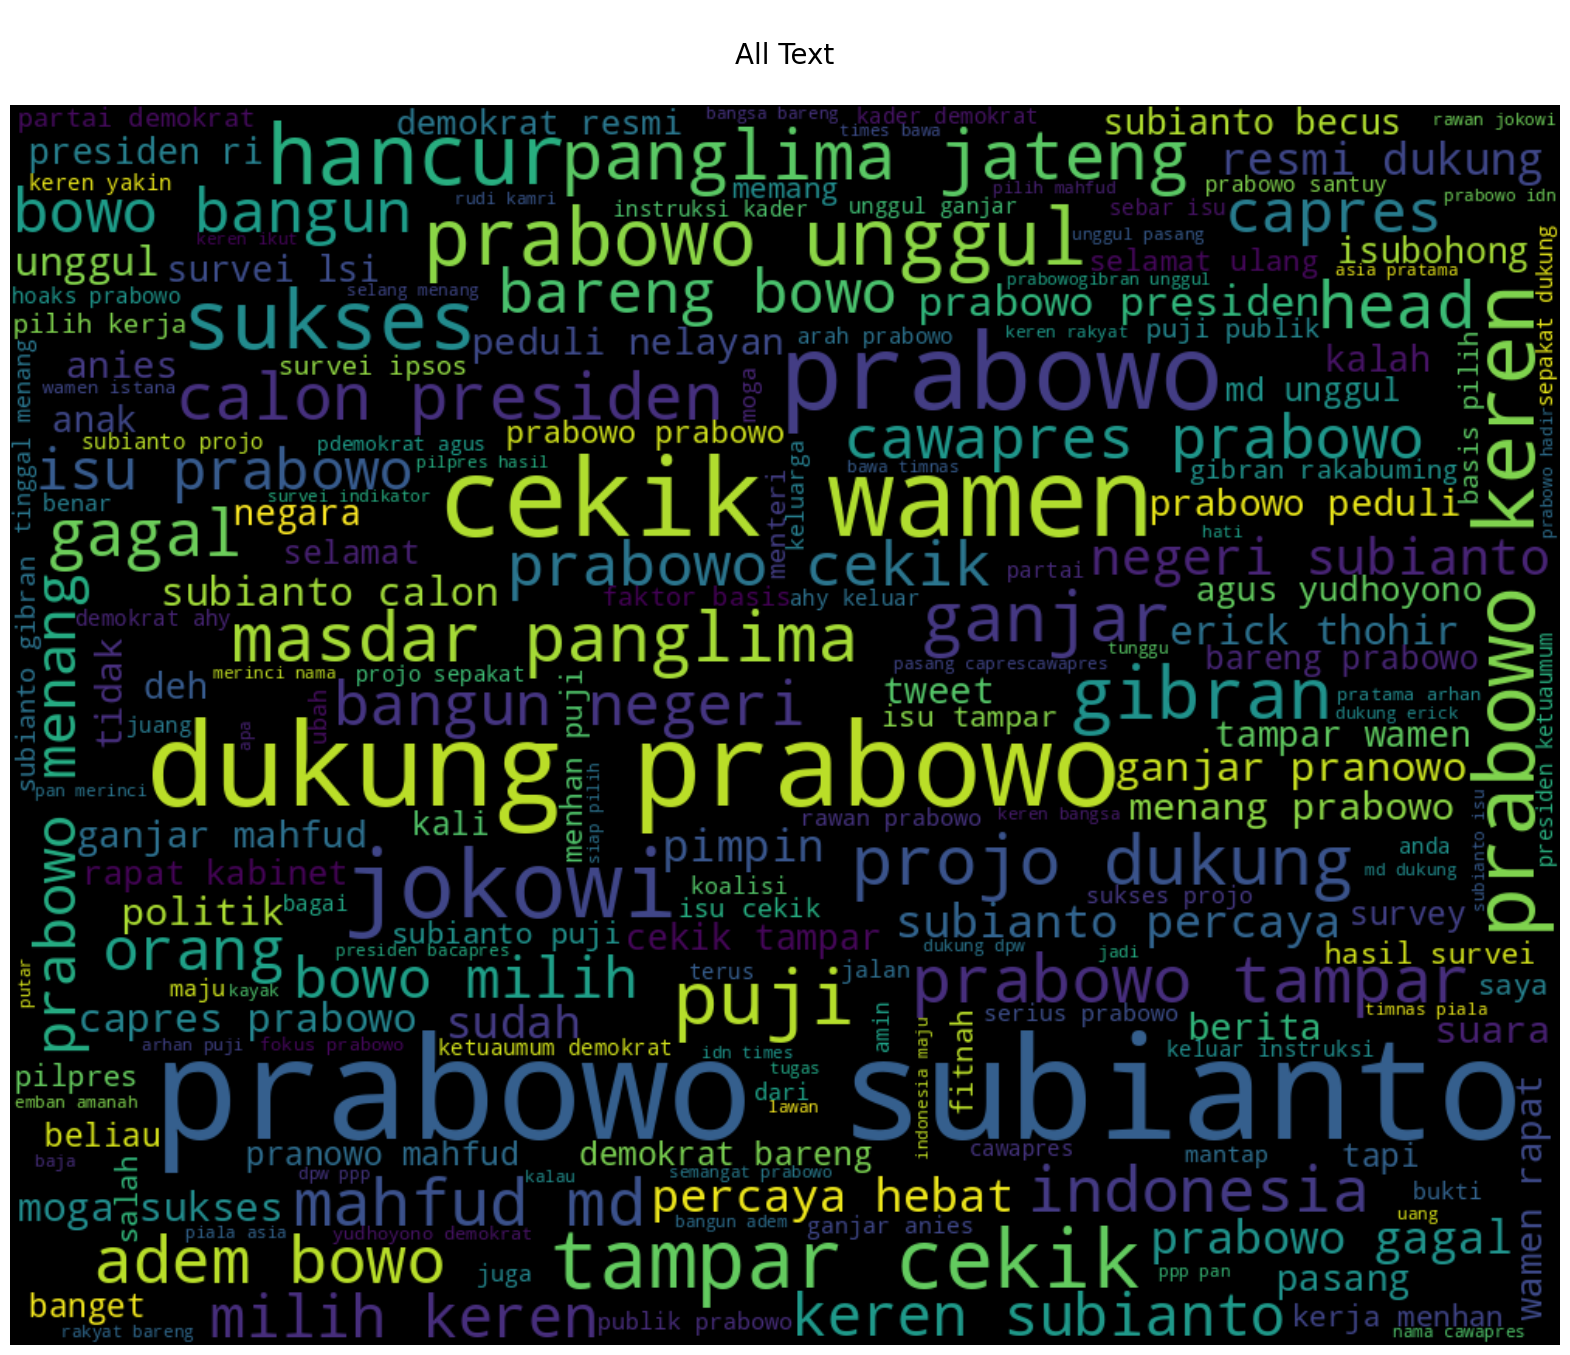

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
firstcloud_all = WordCloud(
    background_color='black',
    width=1000,
    height=800
).generate(" ".join(raw_data['text_join']))
ax.imshow(firstcloud_all, interpolation='bilinear')
ax.set_title('\nAll Text\n', fontsize=20)
ax.axis('off')
plt.show()

(-0.5, 999.5, 799.5, -0.5)

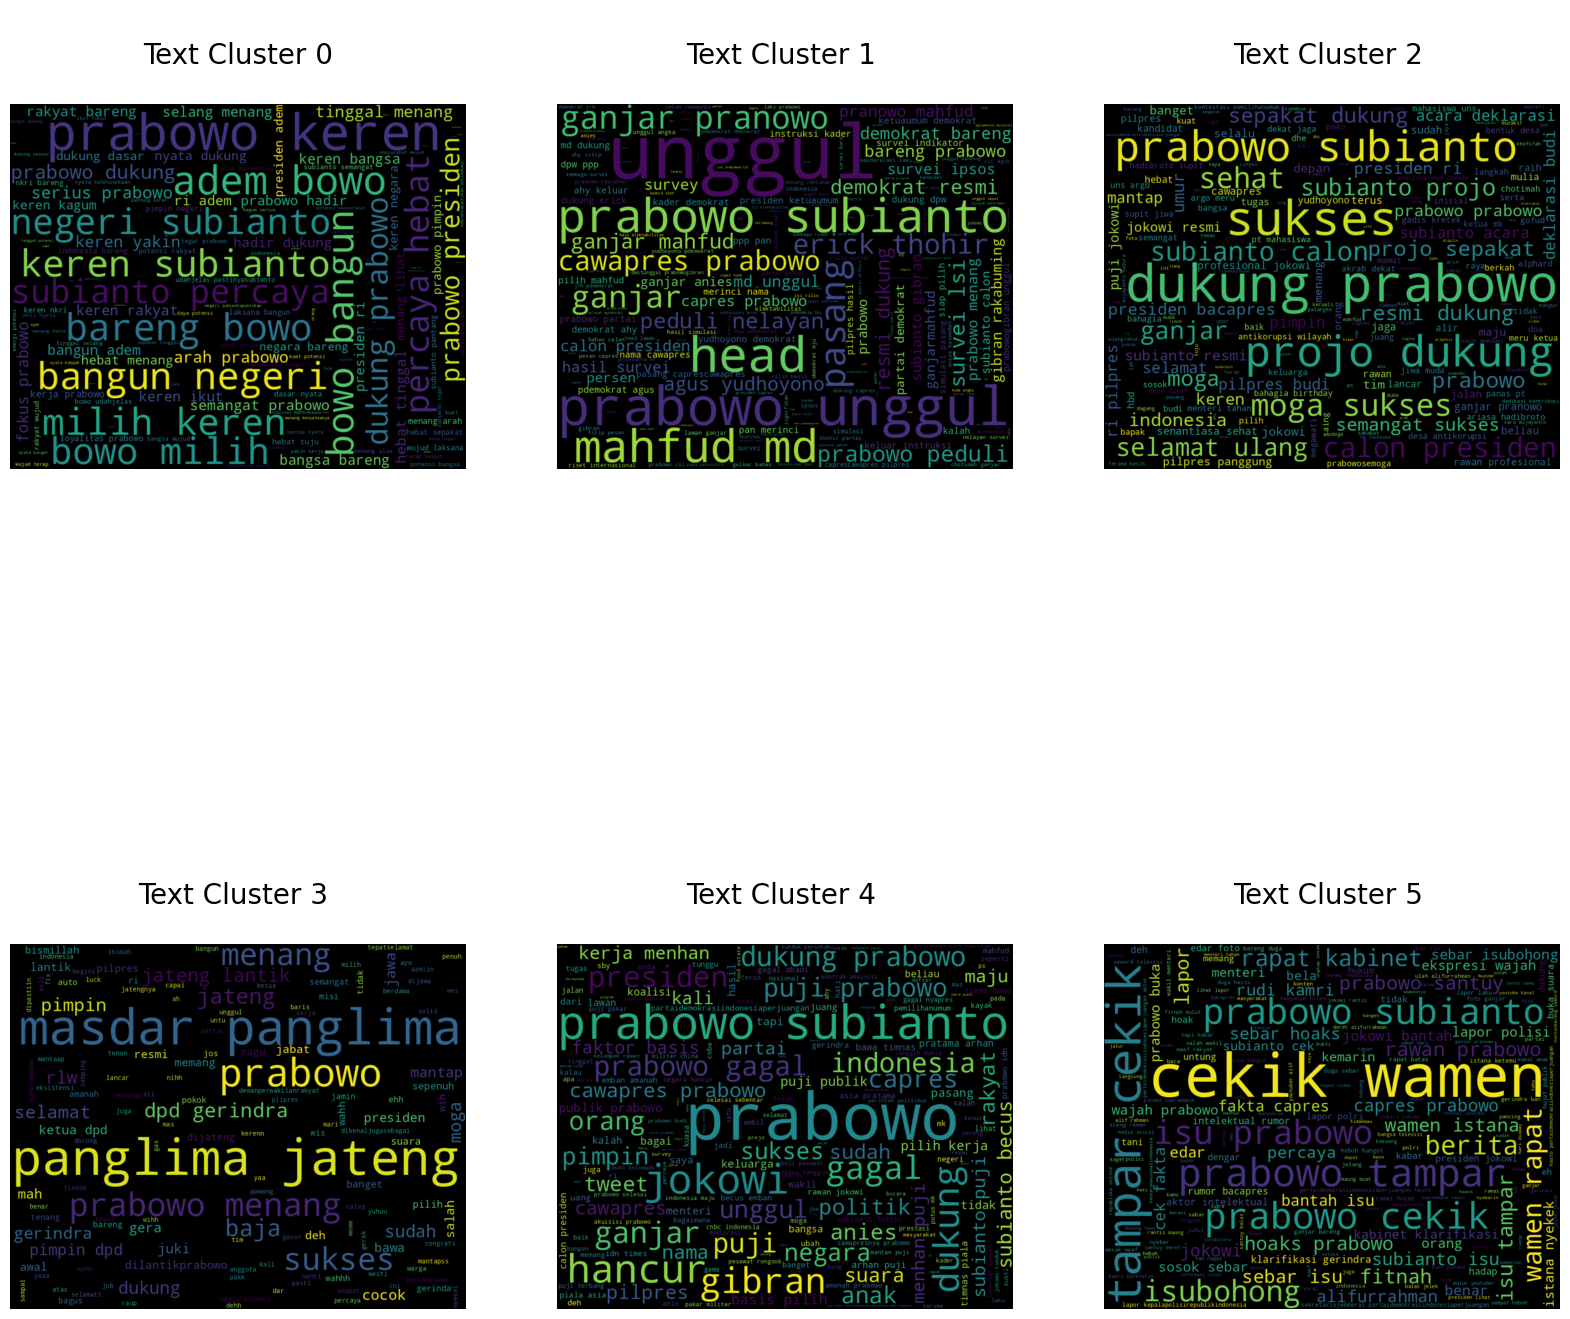

In [ ]:
fig, ax = plt.subplots(2, 3, figsize  = (20,20))
firstcloud_0=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==0]['text_join']))
firstcloud_1=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==1]['text_join']))
firstcloud_2=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==2]['text_join']))
firstcloud_3=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==3]['text_join']))
firstcloud_4=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==4]['text_join']))
firstcloud_5=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==5]['text_join']))

ax[0, 0].imshow(firstcloud_0, interpolation='bilinear')
ax[0, 0].set_title('\nText Cluster 0\n', fontsize=20)
ax[0, 0].axis('off')
print('\n')
ax[0, 1].imshow(firstcloud_1, interpolation='bilinear')
ax[0, 1].set_title('\nText Cluster 1 \n', fontsize=20)
ax[0, 1].axis('off')
print('\n')
ax[0, 2].imshow(firstcloud_2, interpolation='bilinear')
ax[0, 2].set_title('\nText Cluster 2 \n', fontsize=20)
ax[0, 2].axis('off')
print('\n')
ax[1, 0].imshow(firstcloud_3, interpolation='bilinear')
ax[1, 0].set_title('\nText Cluster 3 \n', fontsize=20)
ax[1, 0].axis('off')
print('\n')
ax[1, 1].imshow(firstcloud_4, interpolation='bilinear')
ax[1, 1].set_title('\nText Cluster 4 \n', fontsize=20)
ax[1, 1].axis('off')
print('\n')
ax[1, 2].imshow(firstcloud_5, interpolation='bilinear')
ax[1, 2].set_title('\nText Cluster 5 \n', fontsize=20)
ax[1, 2].axis('off')

In [ ]:
# map clusters to appropriate labels
cluster_map = {0: "Cluster 0", 1: "Cluster 1", 2: "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5"}
# apply mapping
raw_data['cluster'] = raw_data['cluster'].map(cluster_map)

In [ ]:
raw_data['cluster']

0       Cluster 4
1       Cluster 4
2       Cluster 4
3       Cluster 4
4       Cluster 4
          ...    
2094    Cluster 4
2095    Cluster 1
2096    Cluster 1
2097    Cluster 4
2098    Cluster 1
Name: cluster, Length: 2099, dtype: object

In [ ]:
#Melihat Distribusi Sentimen
from collections import Counter

Counter(raw_data['cluster'])

Counter({'Cluster 4': 924,
         'Cluster 5': 293,
         'Cluster 2': 254,
         'Cluster 3': 102,
         'Cluster 0': 155,
         'Cluster 1': 371})

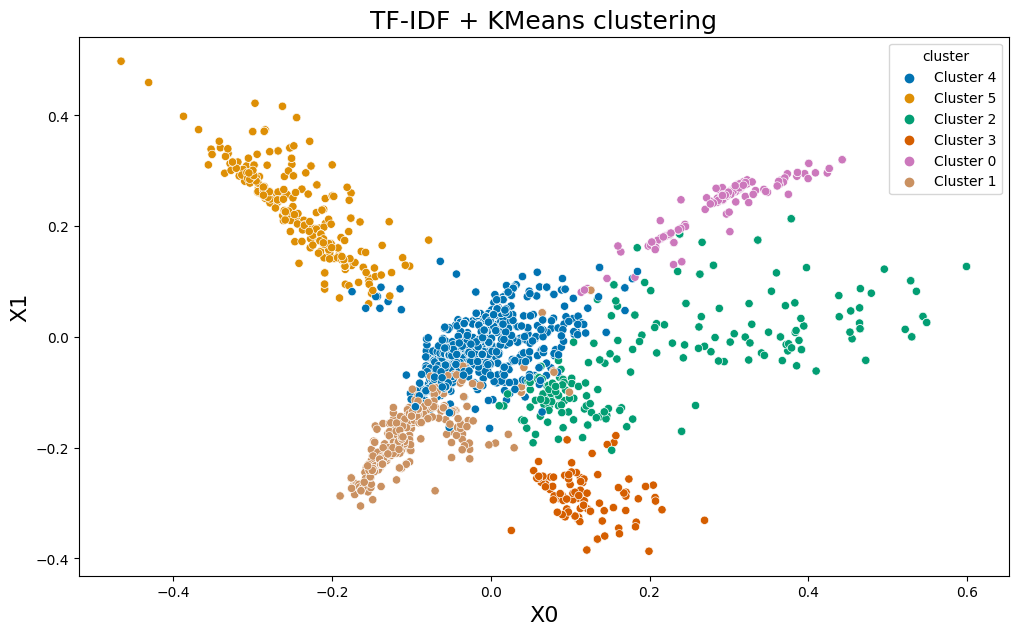

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=raw_data, x='x0', y='x1', hue='cluster', palette="colorblind")
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

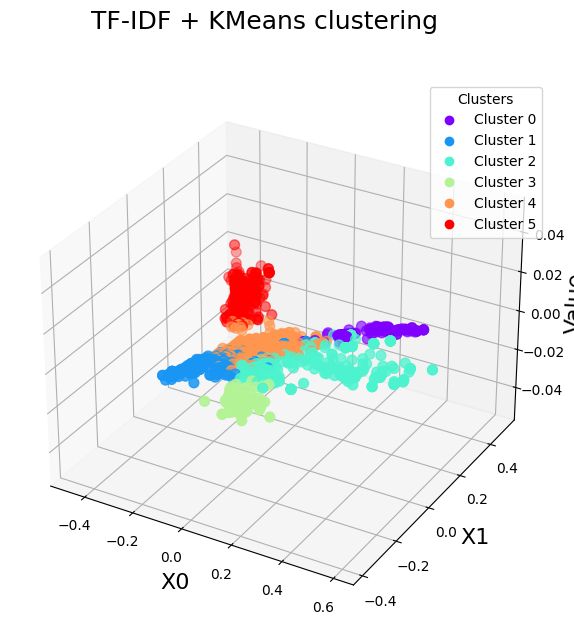

In [ ]:
# Membuat dictionary untuk mengonversi nama klaster menjadi angka
cluster_dict = {'Cluster 0': 0, 'Cluster 1': 1, 'Cluster 2': 2, 'Cluster 3': 3, 'Cluster 4': 4, 'Cluster 5': 5}

# Mengonversi kolom cluster menjadi angka menggunakan dictionary yang telah dibuat
raw_data['cluster_numeric'] = raw_data['cluster'].map(cluster_dict)

# Set image size
fig = plt.figure(figsize=(12, 7))
# Set a title
fig.suptitle("TF-IDF + KMeans clustering", fontsize=18)
# Add 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot with seaborn, where hue is the class used to group the data
scatter = ax.scatter(raw_data['x0'], raw_data['x1'], [0] * len(raw_data), c=raw_data['cluster_numeric'], marker='o', s=50, cmap='rainbow')
# Set axes names
ax.set_xlabel("X0", fontsize=16)
ax.set_ylabel("X1", fontsize=16)
ax.set_zlabel("Value", fontsize=16)

# Add legend for clusters
handles, labels = scatter.legend_elements(prop="colors")
legend = ax.legend(handles, cluster_dict.keys(), loc="upper right", title="Clusters")

# Show the plot
plt.show()

In [ ]:
#Menampilkan 10 kata yang paling sering muncul pada masing-masing cluster
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    raw_data = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in raw_data.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

get_top_keywords(10)


Cluster 0
hebat,prabowo,percaya,negeri,bangun,milih,subianto,adem,bowo,keren

Cluster 1
lsi,hasil,pasang,md,mahfud,head,prabowo,ganjar,survei,unggul

Cluster 2
pilpres,calon,selamat,sehat,subianto,moga,prabowo,dukung,projo,sukses

Cluster 3
lantik,gerindra,dpd,baja,sukses,prabowo,menang,masdar,panglima,jateng

Cluster 4
negara,indonesia,dukung,gibran,jokowi,subianto,hancur,gagal,puji,prabowo

Cluster 5
hoaks,sebar,lapor,rapat,isubohong,prabowo,isu,tampar,wamen,cekik


In [ ]:
raw_data['cluster'].value_counts()

Cluster 3    1126
Cluster 4     315
Cluster 0     296
Cluster 1     290
Cluster 2     155
Cluster 5     102
Name: cluster, dtype: int64

In [ ]:
datafinal = raw_data[["created_at", "username", "text", "prepros_text","text_join","cluster"]]

In [ ]:
datafinal

created_at       username  \
0     Fri Aug 11 00:18:47 +0000 2023   kalebdamonda   
1     Fri Aug 11 07:26:34 +0000 2023  Mahardika9036   
2     Fri Aug 18 08:15:16 +0000 2023   MyNameIsJuki   
3     Fri Aug 18 17:06:22 +0000 2023   MyNameIsJuki   
4     Fri Jan 06 11:43:17 +0000 2023   Backup098765   
...                              ...            ...   
2094  Thu Oct 19 09:38:12 +0000 2023        fathw25   
2095  Thu Oct 19 09:19:38 +0000 2023      Syahriss0   
2096  Thu Oct 19 09:15:55 +0000 2023        BwSahar   
2097  Thu Oct 19 09:15:28 +0000 2023        BwSahar   
2098  Thu Oct 19 09:15:15 +0000 2023        BwSahar   

                                                   text  \
0     Prabowo Subianto ga becus kerja!! https://t.co...   
1     Prabowo Subianto tidak becus menhan, hanya ham...   
2     Gosah sok peduli ganjar, @PDI_Perjuangan kriti...   
3     KAMPRET pandai berkilah,menteri nya gak becus ...   
4     Mereka yang tidak ingin keadaan bangsa kita be...   
...                                                 ...   
2094  Prabowo Mendadak Blusukan" ke Media Center KTT...   
2095  Ketika dilihat secara wilayah aglomerasi kultu...   
2096  Ketika dilihat secara wilayah aglomerasi kultu...   
2097  Kendati Ganjar yang diusung PDIP dan PPP elekt...   
2098  Simulasi dua calon atau head to head, Prabowo ...   

                                           prepros_text  \
0                       prabowo subianto ga becus kerja   
1     prabowo subianto tidak becus menhan hanya hamb...   
2     gosah sok peduli ganjar perjuangan kritik food...   
3     kampret pandai berkilahmenteri nya gak becus b...   
4     mereka yang tidak ingin keadaan bangsa kita be...   
...                                                 ...   
2094  prabowo mendadak blusukan ke media center ktt ...   
2095  ketika dilihat secara wilayah aglomerasi kultu...   
2096  ketika dilihat secara wilayah aglomerasi kultu...   
2097  kendati ganjar yang diusung pdip dan ppp elekt...   
2098  simulasi dua calon atau head to head prabowo b...   

                                              text_join    cluster  
0                          prabowo subianto becus kerja  Cluster 5  
1      prabowo subianto becus menhan hambur uang negara  Cluster 5  
2     gosah sok peduli ganjar juang kritik food esta...  Cluster 5  
3     kampret pandai berkilahmenteri becus adu presi...  Cluster 5  
4     bangsa berobah tahan kondisi korup bobrok fitn...  Cluster 5  
...                                                 ...        ...  
2094  prabowo dadak blusukan media center ktt asean ...  Cluster 5  
2095  wilayah aglomerasi kultural ganjar unggul wila...  Cluster 0  
2096  wilayah aglomerasi kultural ganjar unggul wila...  Cluster 0  
2097  kendati ganjar usung pdip ppp elektabilitasnya...  Cluster 0  
2098  simulasi calon head to head prabowo balik ungg...  Cluster 0  

[2099 rows x 6 columns]

In [ ]:
# Mengubah nilai cluster sesuai dengan permintaan
datafinal['cluster'] = datafinal['cluster'].replace({'Cluster 0': 'nonblack-campaign', 'Cluster 1': 'nonblack-campaign', 'Cluster 2': 'nonblack-campaign', 'Cluster 3': 'black-campaign', 'Cluster 4': 'nonblack-campaign', 'Cluster 5': 'black-campaign'})

# Mengubah nama kolom 'cluster' menjadi 'label'
datafinal.rename(columns={'cluster': 'label'}, inplace=True)

<ipython-input-539-33005f01ba93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafinal['cluster'] = datafinal['cluster'].replace({'Cluster 0': 'nonblack-campaign', 'Cluster 1': 'nonblack-campaign', 'Cluster 2': 'nonblack-campaign', 'Cluster 3': 'black-campaign', 'Cluster 4': 'nonblack-campaign', 'Cluster 5': 'black-campaign'})
<ipython-input-539-33005f01ba93>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafinal.rename(columns={'cluster': 'label'}, inplace=True)


In [ ]:
Counter(datafinal['label'])

Counter({'black-campaign': 1147, 'nonblack-campaign': 952})

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
datafinal.to_csv('prabowo-final.csv', index=False)

In [ ]:
# Membaca kembali file CSV yang disimpan
df = pd.read_csv('/content/prabowo-final.csv')
df

created_at       username  \
0     Fri Aug 11 00:18:47 +0000 2023   kalebdamonda   
1     Fri Aug 11 07:26:34 +0000 2023  Mahardika9036   
2     Fri Aug 18 08:15:16 +0000 2023   MyNameIsJuki   
3     Fri Aug 18 17:06:22 +0000 2023   MyNameIsJuki   
4     Fri Jan 06 11:43:17 +0000 2023   Backup098765   
...                              ...            ...   
2094  Thu Oct 19 09:38:12 +0000 2023        fathw25   
2095  Thu Oct 19 09:19:38 +0000 2023      Syahriss0   
2096  Thu Oct 19 09:15:55 +0000 2023        BwSahar   
2097  Thu Oct 19 09:15:28 +0000 2023        BwSahar   
2098  Thu Oct 19 09:15:15 +0000 2023        BwSahar   

                                                   text  \
0     Prabowo Subianto ga becus kerja!! https://t.co...   
1     Prabowo Subianto tidak becus menhan, hanya ham...   
2     Gosah sok peduli ganjar, @PDI_Perjuangan kriti...   
3     KAMPRET pandai berkilah,menteri nya gak becus ...   
4     Mereka yang tidak ingin keadaan bangsa kita be...   
...                                                 ...   
2094  Prabowo Mendadak Blusukan" ke Media Center KTT...   
2095  Ketika dilihat secara wilayah aglomerasi kultu...   
2096  Ketika dilihat secara wilayah aglomerasi kultu...   
2097  Kendati Ganjar yang diusung PDIP dan PPP elekt...   
2098  Simulasi dua calon atau head to head, Prabowo ...   

                                           prepros_text  \
0                       prabowo subianto ga becus kerja   
1     prabowo subianto tidak becus menhan hanya hamb...   
2     gosah sok peduli ganjar perjuangan kritik food...   
3     kampret pandai berkilahmenteri nya gak becus b...   
4     mereka yang tidak ingin keadaan bangsa kita be...   
...                                                 ...   
2094  prabowo mendadak blusukan ke media center ktt ...   
2095  ketika dilihat secara wilayah aglomerasi kultu...   
2096  ketika dilihat secara wilayah aglomerasi kultu...   
2097  kendati ganjar yang diusung pdip dan ppp elekt...   
2098  simulasi dua calon atau head to head prabowo b...   

                                              text_join              label  
0                          prabowo subianto becus kerja     black-campaign  
1      prabowo subianto becus menhan hambur uang negara     black-campaign  
2     gosah sok peduli ganjar juang kritik food esta...     black-campaign  
3     kampret pandai berkilahmenteri becus adu presi...     black-campaign  
4     bangsa berobah tahan kondisi korup bobrok fitn...     black-campaign  
...                                                 ...                ...  
2094  prabowo dadak blusukan media center ktt asean ...     black-campaign  
2095  wilayah aglomerasi kultural ganjar unggul wila...  nonblack-campaign  
2096  wilayah aglomerasi kultural ganjar unggul wila...  nonblack-campaign  
2097  kendati ganjar usung pdip ppp elektabilitasnya...  nonblack-campaign  
2098  simulasi calon head to head prabowo balik ungg...  nonblack-campaign  

[2099 rows x 6 columns]